In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [46]:
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month_name()
month_dict = {1: 'January',
              2: 'February',
              3: 'March',
              4: 'April',
              5: 'May',
              6: 'June',
              7: 'July',
              8: 'August',
              9: 'September',
              10: 'October',
              11: 'November',
              12: 'December'}

In [49]:
month_mean = temp.groupby("month").mean()["Mean_TemperatureC"]
temp["month_mean"]=temp["month"].map(month_mean)

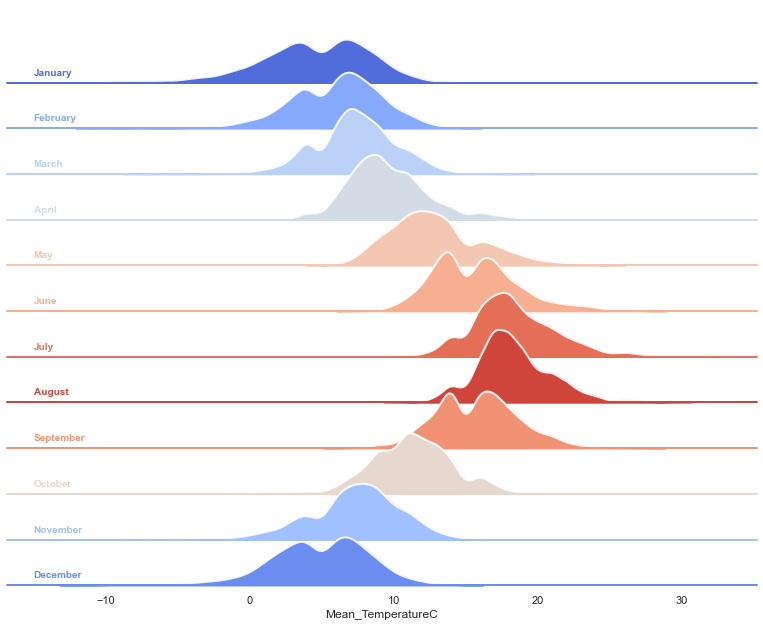

In [111]:

g= sns.FacetGrid(data=temp,row="month",aspect=15,height=0.75,hue="month_mean",palette="coolwarm")
g.map(sns.kdeplot,"Mean_TemperatureC",fill=True,alpha = 1, lw=1.5,clip_on = False)
g.map(sns.kdeplot,"Mean_TemperatureC",alpha =0.9,lw=2,color="w",clip_on = False)
g.map(plt.axhline,y=0,clip_on = False,lw=2)

for i,j in enumerate(g.axes.flat):
    j.text(-15,0.02,month_dict[i+1],color=j.lines[-1].get_color(),weight = "bold")
    j.set_title("")
    j.set_ylabel("")
    
    
g.fig.subplots_adjust(hspace = -0.4)

g.set(yticks=[])

sns.despine(bottom=True,left=True)

In [5]:
a= np.random.randn(5,3)
a

array([[ 1.50842987, -0.48210929,  2.02427836],
       [-0.73029062,  0.89520483, -0.67673179],
       [-1.07044395,  1.75328478, -0.45860801],
       [ 0.08530974,  0.49955303, -1.11713281],
       [ 0.13598083, -1.16066654,  0.26308531]])

In [11]:
pd.DataFrame(a).cumsum(axis=1)

,0,1,2
0,1.508430,-0.482109,2.024278
1,0.778139,0.413096,1.347547
2,-0.292305,2.166380,0.888939
3,-0.206995,2.665933,-0.228194
4,-0.071014,1.505267,0.034891
